
latihan yang dipelajari meliputi:
    1. preprocessing
    2. load gambar dalam sebuah folder 
    3. spliting dataset train test
    4. klasifikasi model evaluasi
    5. Find best parameter

# preprocessing

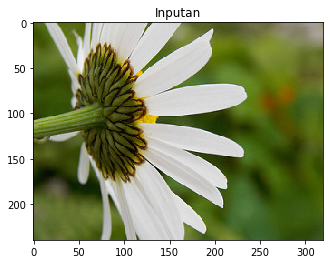

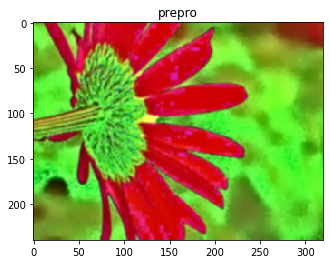

In [11]:
#image preprocessing
import cv2
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
img=cv2.imread('flowers/daisy/14167534527_781ceb1b7a_n.jpg')
plt.figure()
plt.title("Inputan")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

convert = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
enc = cv2.detailEnhance(convert, sigma_s=10, sigma_r=0.15)
edge = cv2.edgePreservingFilter(enc, flags=1, sigma_s=64, sigma_r=0.2)
blur = cv2.GaussianBlur(edge,(5,5),0)  

plt.figure()
plt.title("prepro")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

# membaca data dan memberi label

In [12]:
X = []    

#menentukan direktori/folder data citra yang akan dibuka
dirname = 'flowers/'  

#menentukan ukuran tinggi dan lebar gambar
height = 200
width = 200
dim = (width, height)

#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan= [] 
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))
        if img_path.endswith("jpg"):
            img = cv2.imread(img_path) #baca path data
            
            #preprocessing data / segentasi  boleh dilakukan
            convert = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            resized=cv2.resize(convert,dim, interpolation=cv2.INTER_LINEAR)
            blur = cv2.GaussianBlur(resized,(5,5),0)            
            tampungan.append(blur.flatten())
X = np.array(tampungan) 
#mengetahui ukuran dari np

#labeling
y0 = np.zeros(764)
y1 = np.ones(784)
y = []
y = np.concatenate((y0,y1), axis=0)
print(X.shape)

flowers/
flowers/daisy
flowers/rose
(1548, 120000)


# train test split data

<img src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split_W640.jpg" >

In [13]:
from sklearn.model_selection import train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, stratify=y) 
#train size adalah persentase data test yang di-split

from builtins import range
from builtins import object
num_training = X_train.shape[0] #deklarasi untuk data training diambil dari X_train
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0] #deklarasi untuk data diambil dari Y_train
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Mengubah data citra menjadi baris
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

X_train: (1238, 120000)
X_test: (310, 120000)
y_train: (1238,)
y_test: (310,)


# Klasifikasi KNN

<b>FLOW KLASIFIKASI</b><br>
<img src="tt.png">
<b>KNN</b><br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">
<hr>
<b>Metode evaluasi</b><br>
<img src="https://dataq.files.wordpress.com/2013/06/rumus.png">

### Test model terhadap beberapa data split

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)*100
presisi = precision_score(y_test, y_pred, average='macro')*100
recall =recall_score(y_test, y_pred, average='macro')*100

print('akurasi: '+ str(akurasi))
print('presisi: '  +str(presisi))
print('recall: '  +str(recall))


akurasi: 63.2258064516129
presisi: 65.14703813141973
recall: 63.44448607468465


### Uji testing data baru

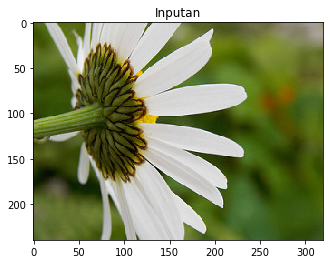

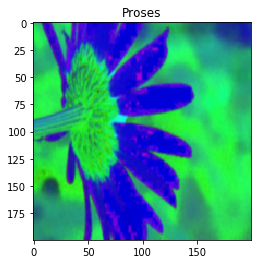

[[1. 0.]]
daisy = 100.0%
rose = 0.0%
The predicted image is : [0]daisy


In [15]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)

url= 'flowers/daisy/14167534527_781ceb1b7a_n.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Inputan")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#Hasil Uji Klasifikasi pada dataset
Categories = ['daisy','rose']

convert = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
blur = cv2.GaussianBlur(convert,(5,5),0)
img_resize=cv2.resize(blur,(200,200))
plt.figure()
plt.title("Proses")
plt.imshow(img_resize)
plt.show()
l=[img_resize.flatten()]


# Mengecek hasil klasifikasi pada salah satu dataset
probability=model.predict_proba(l)
print(probability)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
hasil = model.predict(l).astype(int)
print("The predicted image is : "+str(hasil)+Categories[int(hasil)])


# find best parameter in algorithm

<img src="https://cdn-images-1.medium.com/max/1009/1*1RPHQk-xpKMInxkEd1qFyg.png">

In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1, 2, 3]}
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, verbose=3, cv=3)
clf.fit(X,y)
best = clf.best_estimator_
print(clf.best_estimator_)
print(clf.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=1, score=0.609, total= 1.9min
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.574, total= 2.0min
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.610, total= 1.8min
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.580, total= 1.8min
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.562, total= 2.0min
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.575, total= 1.8min
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.615, total= 1.9min
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.614, total= 1.8min
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.627, total= 1.8min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 16.9min finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
0.6188630490956072


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

model = best
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)*100
presisi = precision_score(y_test, y_pred, average='macro')*100
recall =recall_score(y_test, y_pred, average='macro')*100

print('akurasi: '+ str(akurasi))
print('presisi: '  +str(presisi))
print('recall: '  +str(recall))

akurasi: 59.354838709677416
presisi: 60.67363530778165
recall: 59.564547687440154
